# 1-set Up Your Python Environment

In [1]:
! pip install pandas numpy seaborn matplotlib scikit-learn
# Pandas: For data manipulation and analysis.
# umPy: For numerical operations on data.
# Seaborn & Matplotlib: For data visualization.
# Scikit-learn: For machine learning 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
    

# 2- Load the Dataset

In [19]:
df = pd.read_csv('trainN.csv')
pd.set_option('display.expand_frame_repr', False) 


In [20]:
print(df.head())  # Shows the first 5 rows of the dataset

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


In [21]:
print(df.info())  # Displays data types and counts for each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [22]:
print(df.describe())  # Summary statistics for numerical columns


       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


# 3-Data Cleaning

In [23]:
print(df.isnull().sum())  # Count of missing values in each column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


-- Handle Missing Values <age || cabin ||embarked >

In [24]:

df['Age'].fillna(df['Age'].median(), inplace=True)
 #Age: Since age is important in survival analysis, we fill in missing values. You can fill missing Age values with the median age:


C:\Users\Abdo\AppData\Local\Temp\ipykernel_8936\2970645593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [25]:
df.drop(columns=['Cabin'], inplace=True)


#Cabin: There are too many missing values in the Cabin column, so it's best to drop this column entirely

In [26]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Embarked: A few missing values here can be filled with the most frequent value (mode)

C:\Users\Abdo\AppData\Local\Temp\ipykernel_8936\4320599.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [27]:
print(df.isnull().sum())  # Count of missing values in each column

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


-- Check for Duplicates 

In [28]:
df.drop_duplicates(inplace=True)

#Ensure there are no duplicate rows in the datasetx 


-- Convert Data Types fOR IMPROVE My performance 

In [29]:
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


In [33]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 58.8+ KB
None


# 4- Exploratory Data Analysis (EDA)

- Univariate Analysis (Analyzing One Variable at a Time)

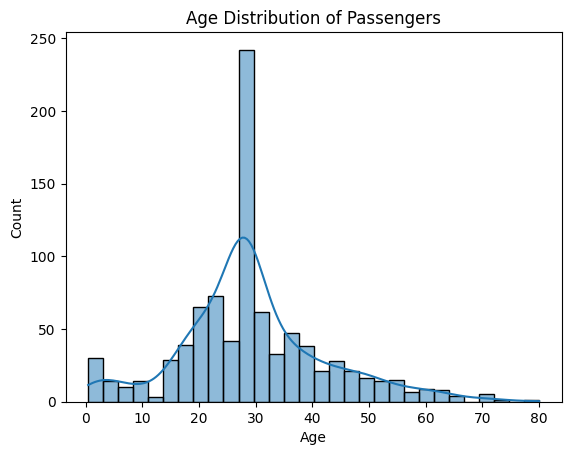

In [40]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.savefig('age_distribution.png')  # Save plot to file
plt.show()


#sns.histplot
#Purpose: sns.histplot is used to visualize the distribution of a continuous variable.

In [41]:
print(df['Age'].value_counts())


Age
28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64


In [42]:
print(df['Age'].describe())


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


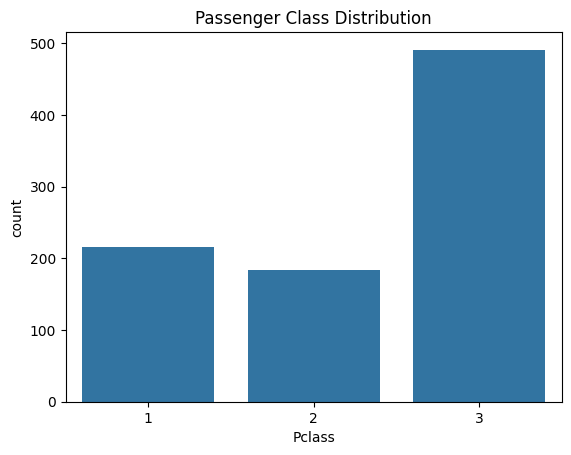

In [36]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.savefig("Passenger Class Distribution.png")
plt.show()

#Purpose: sns.countplot is used to visualize the distribution of a categorical variable.

In [38]:
print(df['Pclass'].value_counts())

#use value_counts() to see how often each category occurs

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


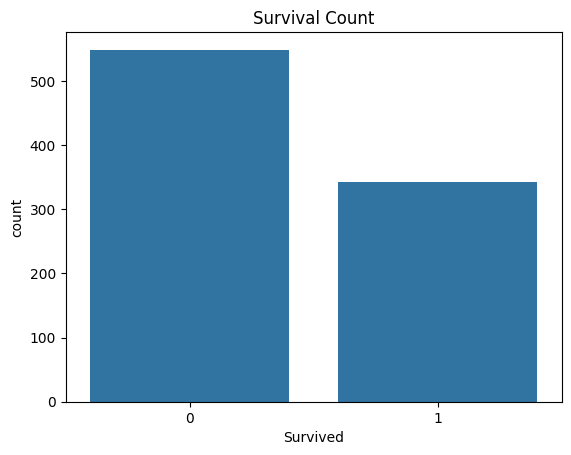

In [43]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.savefig("Purvival Count.png")
plt.show()


In [44]:
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


- Bivariate Analysis (Analyzing Two Variables Together)

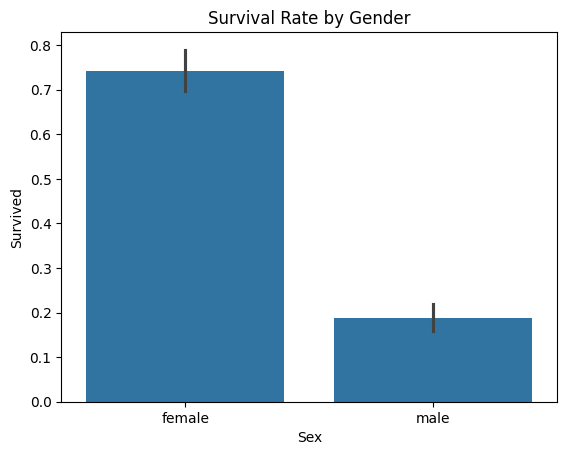

In [45]:
#Categorical vs. Categorical
#Survival by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.savefig("Survival Rate by Gende.png")
plt.show()


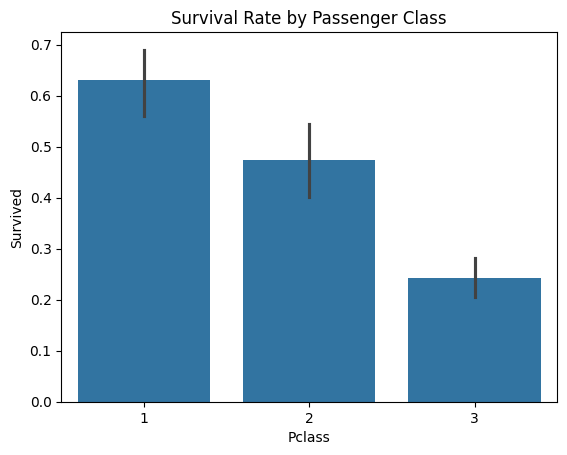

In [46]:
#Categorical vs. Categorical
#Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.savefig("Survival Rate by assenger Class.png")
plt.show()


C:\Users\Abdo\AppData\Local\Temp\ipykernel_8936\1269349196.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survived')
C:\Users\Abdo\AppData\Local\Temp\ipykernel_8936\1269349196.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Not Survived')


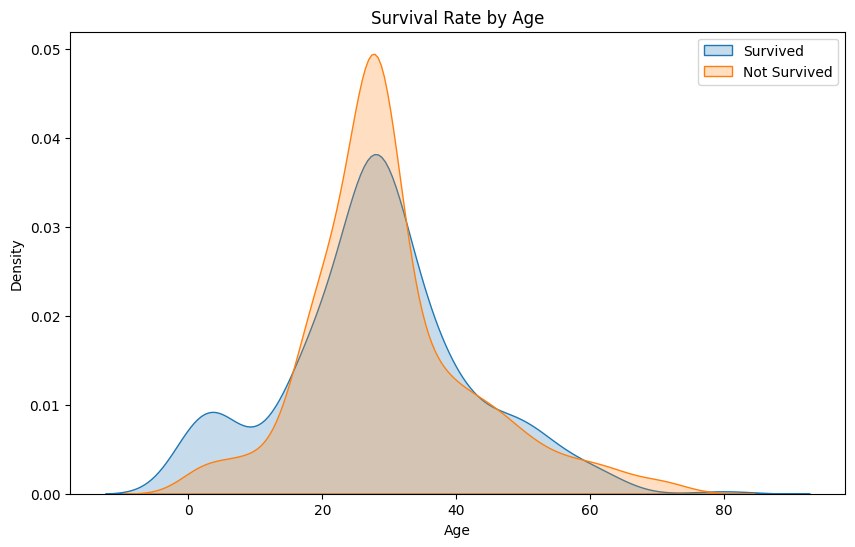

In [47]:
#Categorical vs. Numerical
#Survived vs. Age
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Not Survived')
plt.title('Survival Rate by Age')
plt.savefig("Survival Rate by Age.png")
plt.legend()
plt.show()


- Multivariate Analysis: Understand relationships between more than two variables.



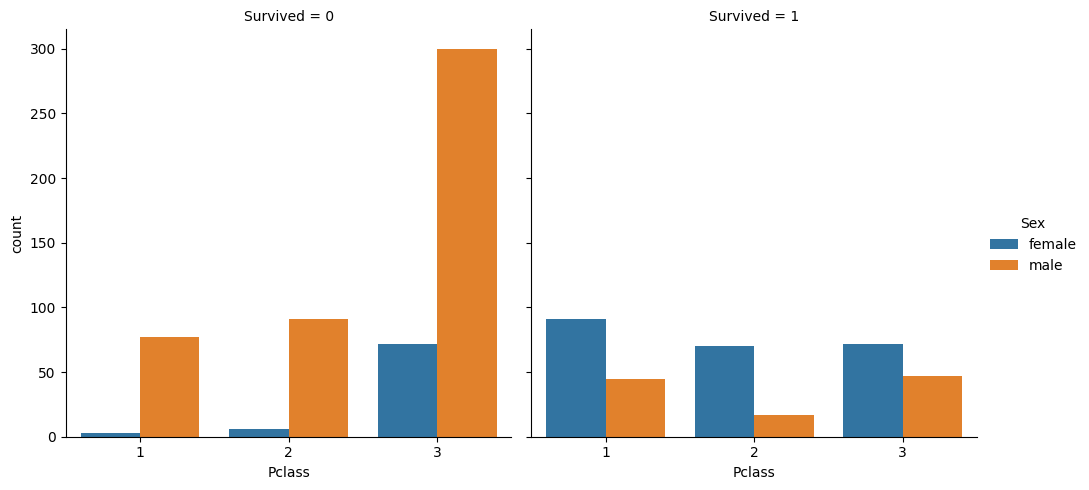

In [49]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')

plt.savefig("Survival Rate by sex && pclace")
plt.show()


<Figure size 1000x600 with 0 Axes>

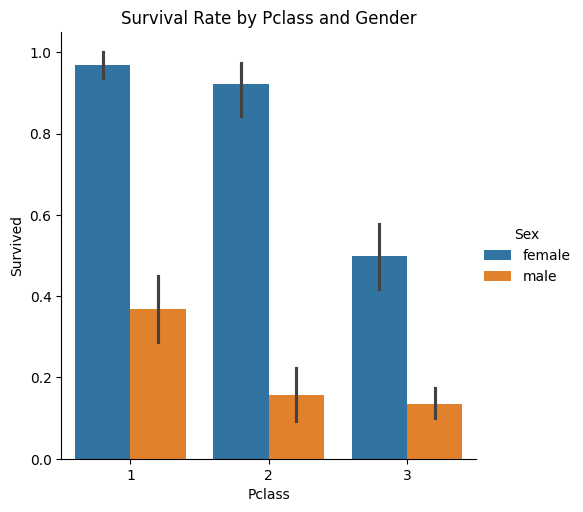

In [50]:
# Plot survival rate by Pclass and Sex
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title('Survival Rate by Pclass and Gender')
plt.savefig('survival_rate_by_pclass_gender.png')  # Save plot to file
plt.show()


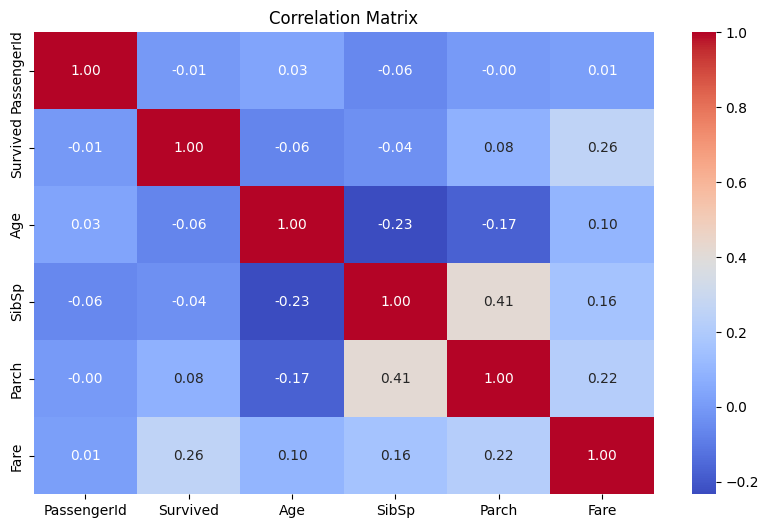

In [53]:
#A correlation matrix

# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the correlation matrix
# Filter numeric columns
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


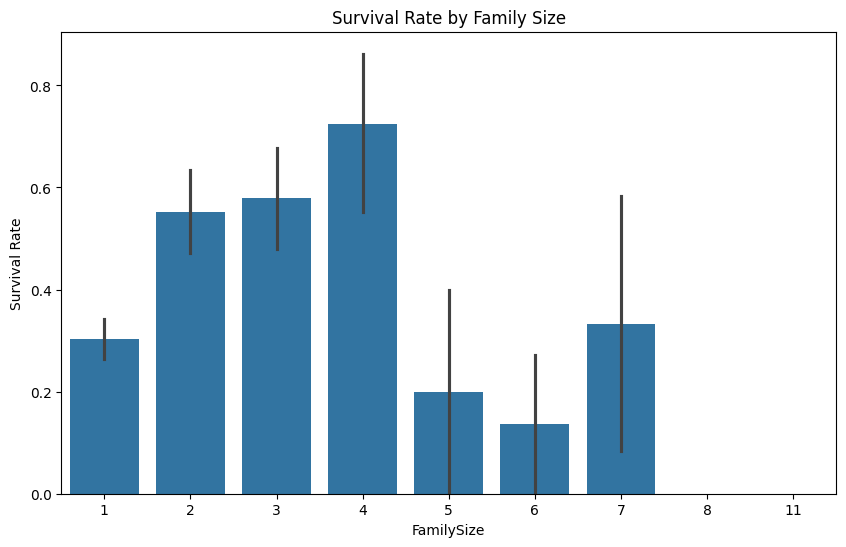

In [58]:
# Create and Visualize New Features
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Visualize FamilySize vs. Survival Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.xlabel('FamilySize')
plt.ylabel('Survival Rate')
plt.savefig('survival_by_family_size.png')
plt.show()


 # 5-Handle Outliers 

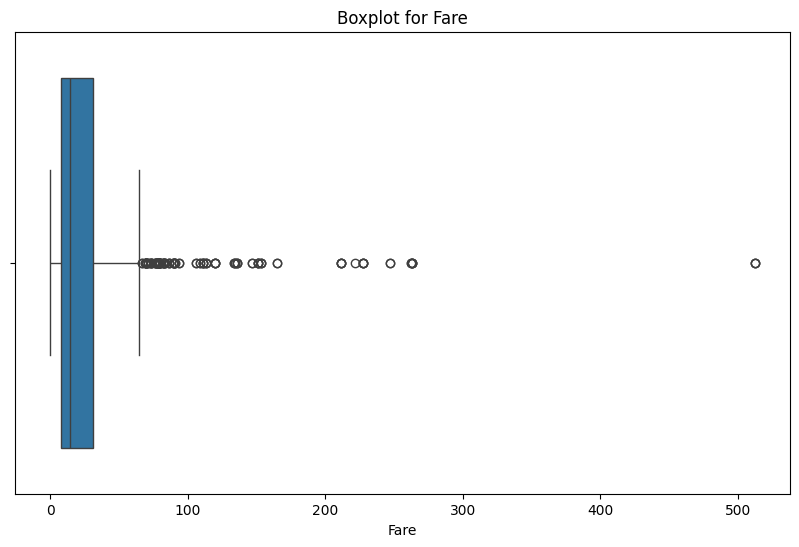

In [59]:
#Visualize Outliers Using a Boxplot


# Create a boxplot to visualize outliers in the 'Fare' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=df)
plt.title('Boxplot for Fare')
plt.xlabel('Fare')
plt.savefig('fare_boxplot.png')
plt.show()


In [56]:
#Remove Outliers Using the Interquartile Range (IQR) Method
# Calculate the first and third quartiles (Q1 and Q3) of the 'Fare' column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


# 6- Save the Cleaned and Processed Data

In [57]:
# Save the cleaned DataFrame to a CSV file
df_filtered.to_csv('cleaned_titanic_data.csv', index=False)
